In [1]:
import numpy as np
import dem_methods

grid = np.tile(np.array([1,2,3,4,5,4,3,2,1]), (10, 1))
# print(grid)
grad = dem_methods.gradient(grid, 1, 1)
print(dem_methods.aspect(grad, degrees=True))
print(dem_methods.slope(grad, degrees=True))


[[ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]
 [ 270.  270.  270.  270.   90.   90.   90.   90.   90.]]
[[ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45

In [2]:
def read_zip_asc():
    from io import BytesIO
    from urllib.request import urlopen
    from zipfile import ZipFile
    zipurl = 'http://www.meteoexploration.com/R/insol/data/dempyrenees.asc.zip'
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            dem_file = zfile.open('dempyrenees.asc').read().decode('utf-8').split('\n')
            return dem_file
    raise FileNotFoundException()

def read_asc():
    dem_file = read_zip_asc()
    header = dict([x.strip(' ').split(' ') for x in dem_file[:6]])
    dem_data = np.array([list(map(int,x.strip(' ').split(' '))) for x in dem_file[6:-1]])
    return header, dem_data

header, dem_data = read_asc()

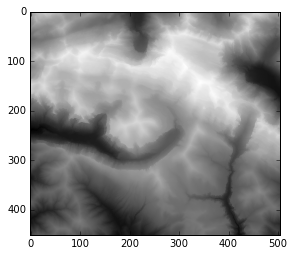

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(dem_data, cmap='Greys_r')
plt.show()

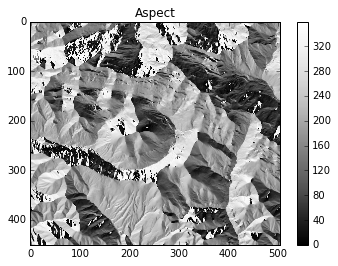

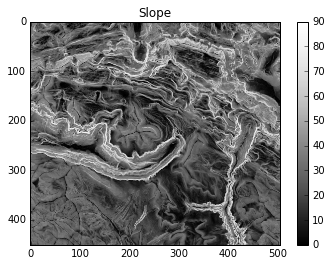

In [9]:
cell_length = int(header['CELLSIZE'])
dem_grad = dem_methods.gradient(dem_data, cell_length, cell_length)
dem_aspect = dem_methods.aspect(dem_grad, degrees=True)
dem_slope = dem_methods.slope(dem_grad, degrees=True)

plt.imshow(dem_aspect, cmap='Greys_r')
plt.title('Aspect')
plt.colorbar()
plt.show()

plt.imshow(dem_slope, vmax=90, cmap='Greys_r')
plt.title('Slope')
plt.colorbar()
plt.show()


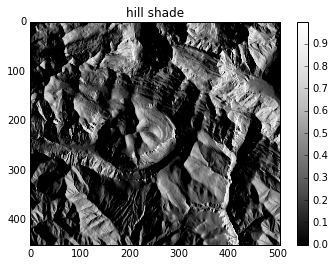

In [11]:
sv = dem_methods.normal_vector(80, 90)
dem_hill_shade = dem_methods.hill_shade(dem_grad, sv)

plt.imshow(dem_hill_shade, cmap='Greys_r')
plt.title('hill shade')
plt.colorbar()
plt.show()


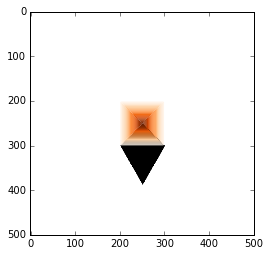

In [12]:
import dem_methods
import matplotlib.pyplot as plt
%matplotlib inline
# define the sun vector: northwest at 15 degrees elevation
sv = dem_methods.normal_vector(70, 270)

## create a pyramid 100 units by side and 50 nunits tall
m = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        m[i,j] = 50 - max(abs(i - 50), abs(j - 50))

## place it on a large flat expanse
mm = np.zeros((500, 500))
mm[200:300, 200:300] = m

# calulate and plot the cast shadows from the sun
sh = dem_methods.raycast(mm, sv, 1).T
plt.contour(mm, 25, cmap='Oranges')
plt.imshow(sh, cmap='Greys_r')
plt.show()


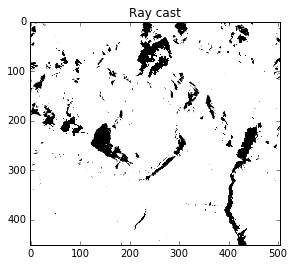

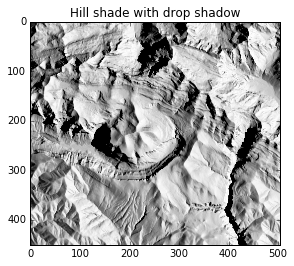

In [14]:
import dem_methods

sv = dem_methods.normal_vector(50, 90)
drop_shadow = dem_methods.raycast(dem_data, sv, cell_length)
dem_hill_shade = dem_methods.hill_shade(dem_grad, sv)
plt.imshow(drop_shadow, cmap='Greys_r')
plt.title('Ray cast')
# plt.colorbar()
plt.show()

hill_shade_raycast = dem_hill_shade * drop_shadow
plt.imshow(hill_shade_raycast, cmap='Greys_r')
plt.title("Hill shade with drop shadow")
plt.show()

In [15]:
import numpy as np

TEST_FILE = 'insol_clone/N50E007.hgt'
FILE_SIDE_LENGTH = 1201  # Length of byte matrix
FILE_CORNER = (50, 7)
BYTE_SIZE = 2
TEST_POINT = (50.8, 7.5)
TEST_ELEVATION = 248


def open_with_numpy():
    with open(TEST_FILE, 'rb') as f:
        return np.fromfile(
            f, np.dtype('>i2'), FILE_SIDE_LENGTH * FILE_SIDE_LENGTH
        ).reshape((FILE_SIDE_LENGTH, FILE_SIDE_LENGTH))


def get_elevation(elevations, lat, lon):
    lat_row = int(round((lat - int(lat)) * (FILE_SIDE_LENGTH - 1), 0))
    lon_row = int(round((lon - int(lon)) * (FILE_SIDE_LENGTH - 1), 0))
    return elevations[
        (FILE_SIDE_LENGTH - 1) - lat_row, lon_row
    ].astype(int)


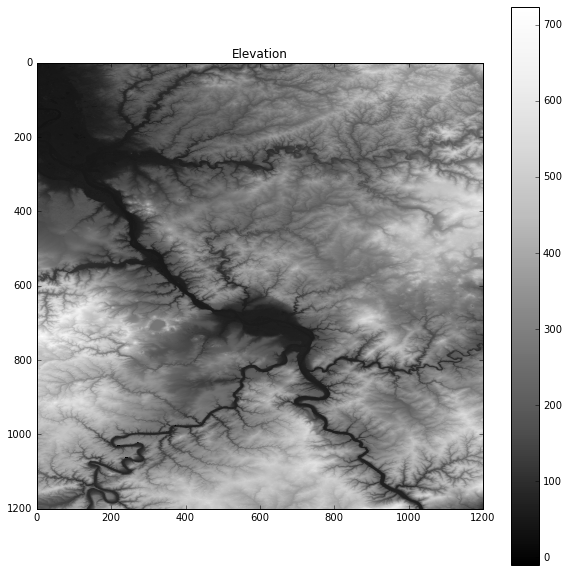

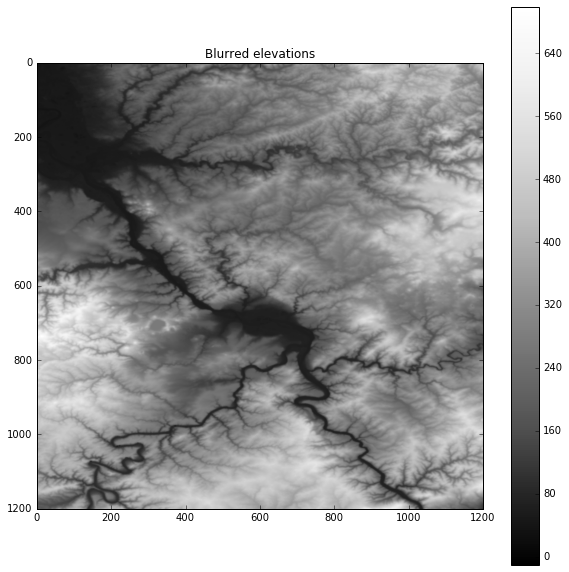

In [16]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
%matplotlib inline

elevations = open_with_numpy()
elevations[elevations == -32768] = 0
bl = ndi.gaussian_filter(elevations, 1.5)

plt.figure(figsize=(10, 10))
plt.imshow(elevations, vmin=-10, cmap='Greys_r')
plt.title("Elevation")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(bl, vmin=-10, cmap='Greys_r')
plt.title("Blurred elevations")
plt.colorbar()
plt.show()


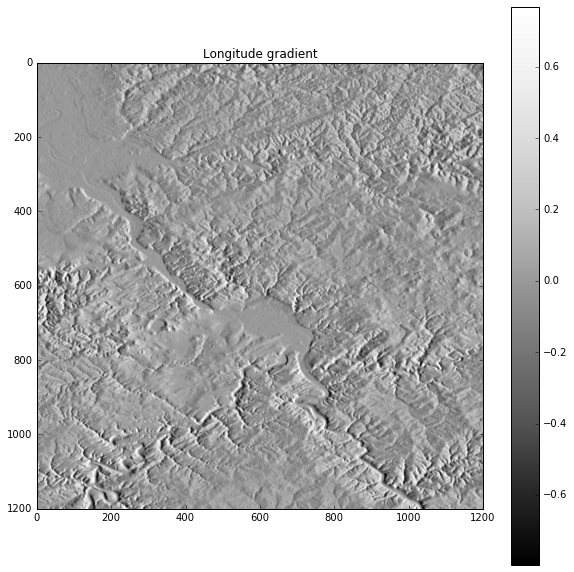

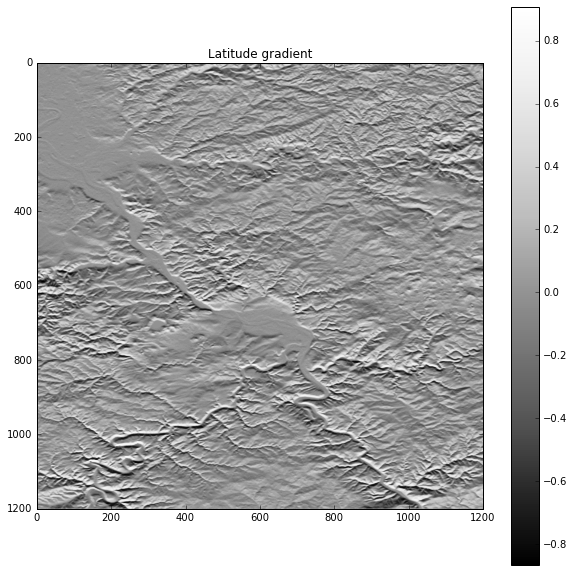

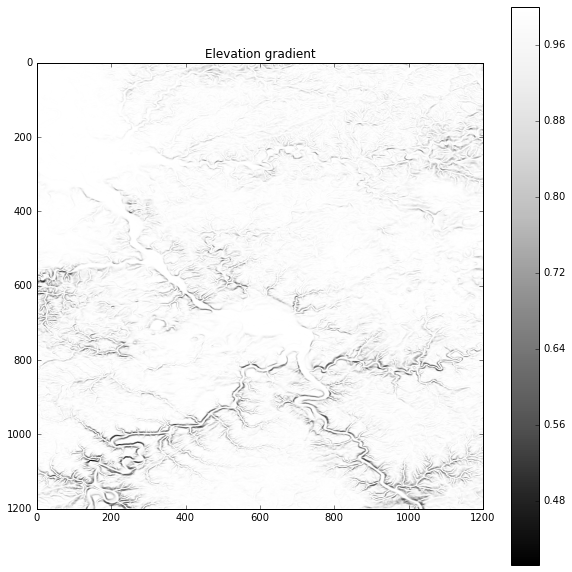

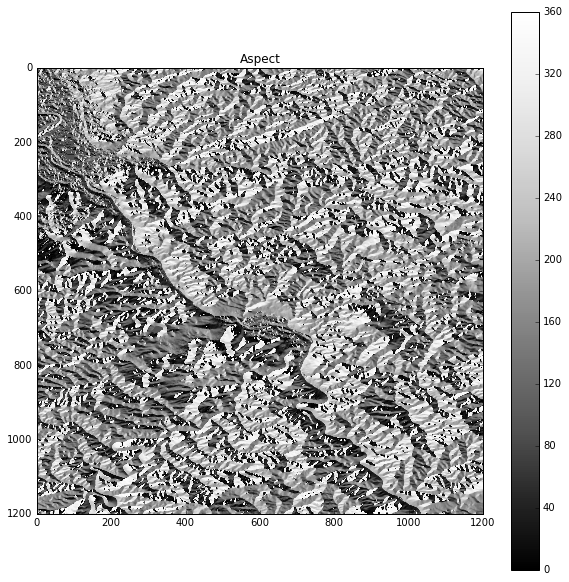

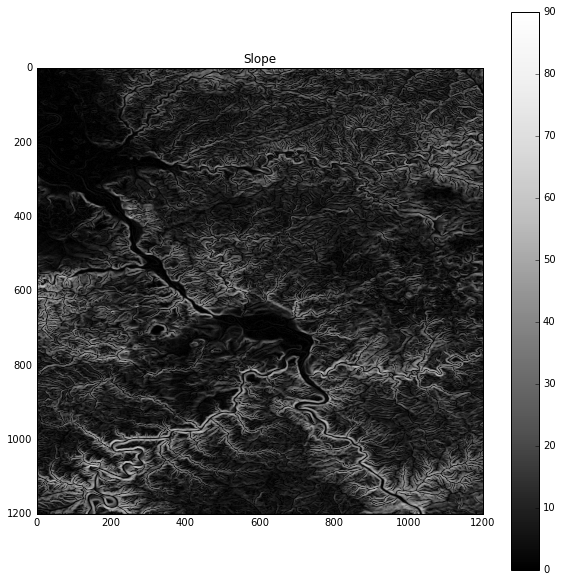

In [17]:
grad = dem_methods.gradient(bl, 30, 30)
aspect = dem_methods.aspect(grad, degrees=True)
slope = dem_methods.slope(grad, degrees=True)

plt.figure(figsize=(10, 10))
plt.imshow(grad[:,:,0], cmap='Greys_r')
plt.title("Longitude gradient")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(grad[:,:,1], cmap='Greys_r')
plt.title("Latitude gradient")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(grad[:,:,2], cmap='Greys_r')
plt.title("Elevation gradient")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(aspect, vmin=0, vmax=360, cmap='Greys_r')
plt.title("Aspect")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(slope, vmin=0, vmax=90, cmap='Greys_r')
plt.title("Slope")
plt.colorbar()
plt.show()


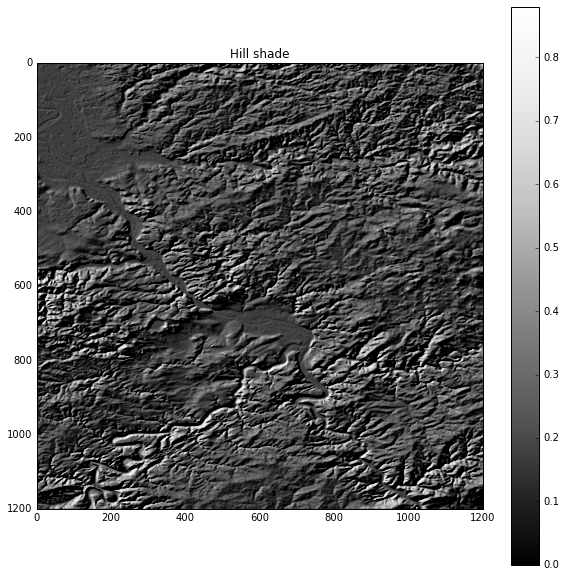

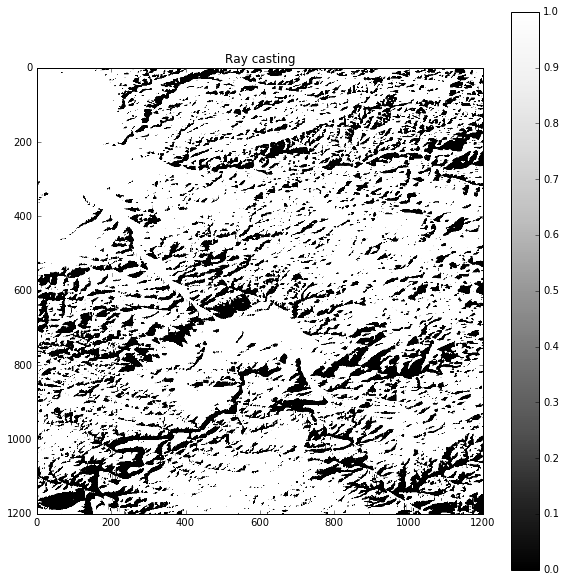

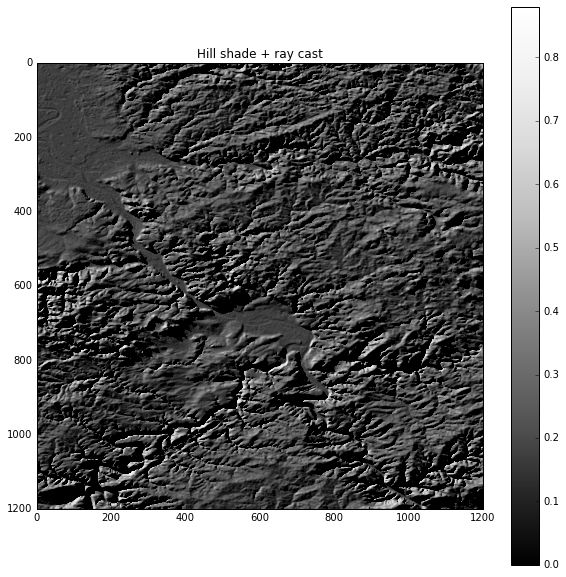

In [18]:
sv = dem_methods.normal_vector(80, 310)
hsh = dem_methods.hill_shade(grad, sv)

plt.figure(figsize=(10,10))
plt.imshow(hsh, cmap='Greys_r')
plt.title("Hill shade")
plt.colorbar()
plt.show()

rc = dem_methods.raycast(bl, sv, 30)
plt.figure(figsize=(10,10))
plt.imshow(rc, cmap='Greys_r')
plt.title("Ray casting")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(hsh * rc, cmap='Greys_r')
plt.title("Hill shade + ray cast")
plt.colorbar()
plt.show()

In [21]:
import dem_methods
from datetime import datetime

# Test declination
test_date = dem_methods.to_juliandate(datetime(2012, 1, 1, 12, 0, 0))
print("Julian date: ", test_date)
print("Solar declination: ", dem_methods.sun_declination(test_date))

Julian date:  2455927.9583333335
Solar declination:  -23.0274356869


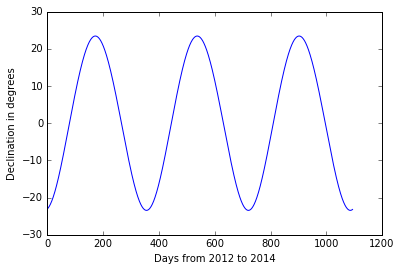

In [22]:
# Plot daily changes in declination from 2012 to 2014
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import dem_methods

dates = [datetime(2012, 1, 1) + timedelta(days=d) for d in range(365 * 3)]
julian_dates = np.array([dem_methods.to_juliandate(d) for d in dates])
plt.plot(dem_methods.sun_declination(julian_dates))
plt.xlabel('Days from 2012 to 2014')
plt.ylabel('Declination in degrees')
plt.show()

In [23]:
from datetime import datetime
import dem_methods
print("Now 1: ", solar.to_juliandate(datetime.now()))
print(dem_methods.sun_vector(dem_methods.to_juliandate(datetime.now()), 51.4778, -0.0017, 0))

Now 1:  2457669.1088934797
[-0.66931801  0.63894996  0.37915214]


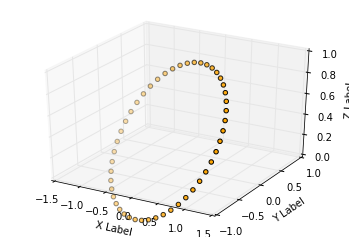

In [28]:
from datetime import datetime
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import dem_methods

june_day = np.array(list(map(
        solar.to_juliandate, 
        [datetime(2012, 6, 21) + timedelta(minutes=(30 * d)) for d in range(48)]
)))
solar_positions = dem_methods.sun_vector(june_day, 51.4778, -0.0017,0).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(solar_positions[:,0], solar_positions[:,1], solar_positions[:,2], c='orange')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
plt.show()


Hour  6
Hour  7
Hour  8
Hour  9
Hour  10
Hour  11
Hour  12
Hour  13
Hour  14
Hour  15
Hour  16
Hour  17
Hour  18
Hour  19
Hour  20
Hour  21
Hour  22


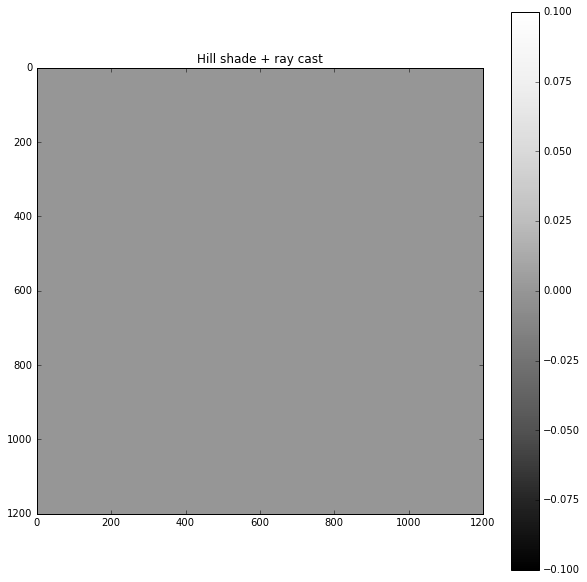

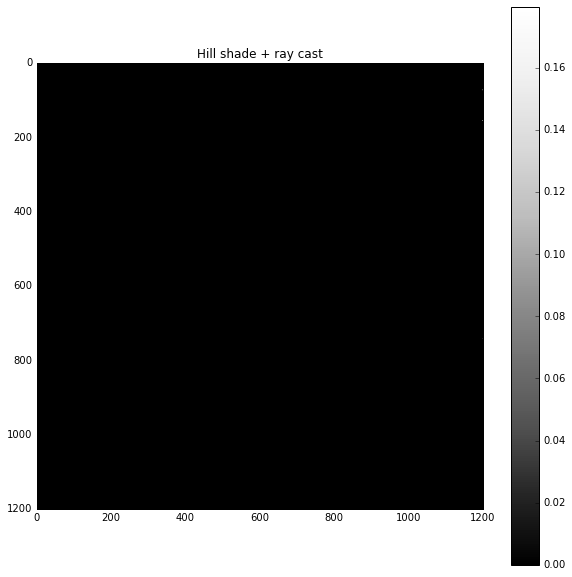

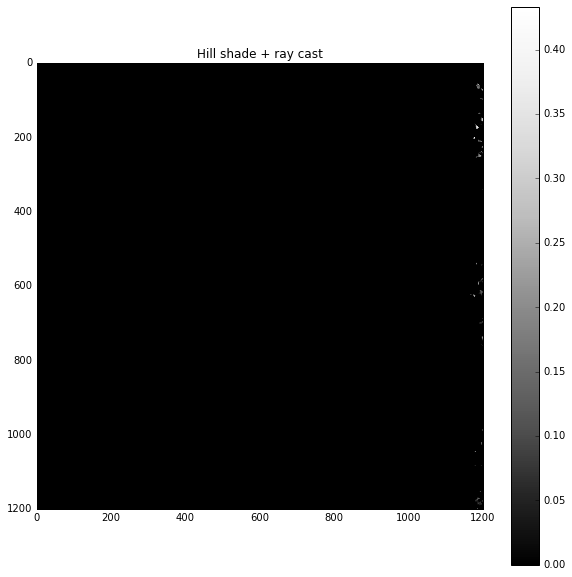

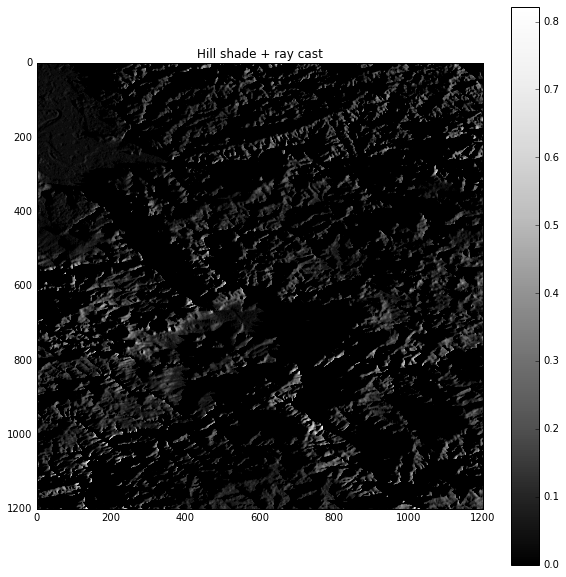

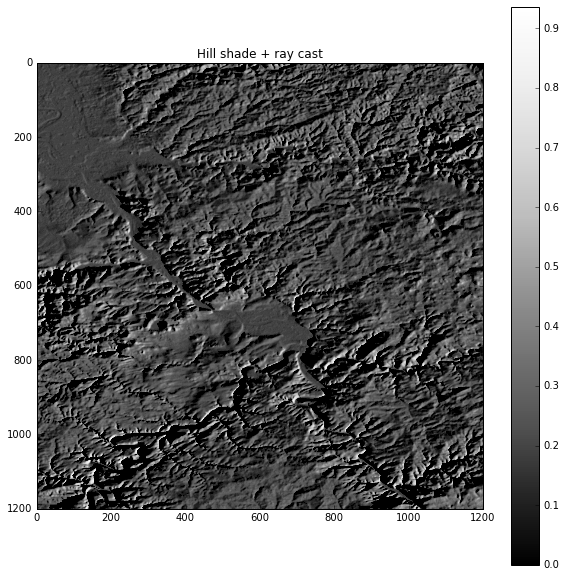

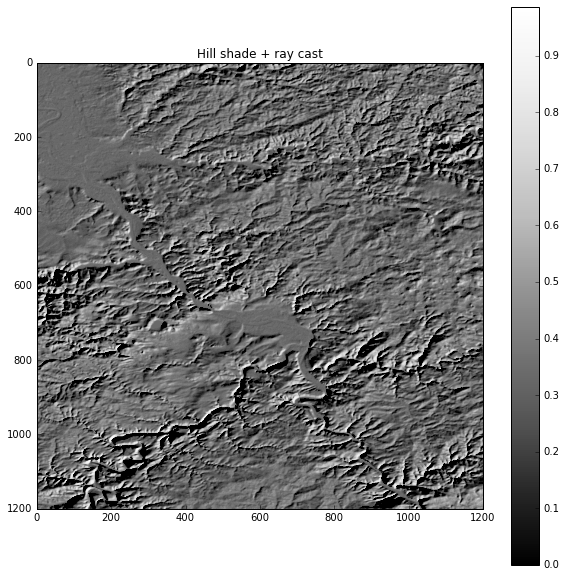

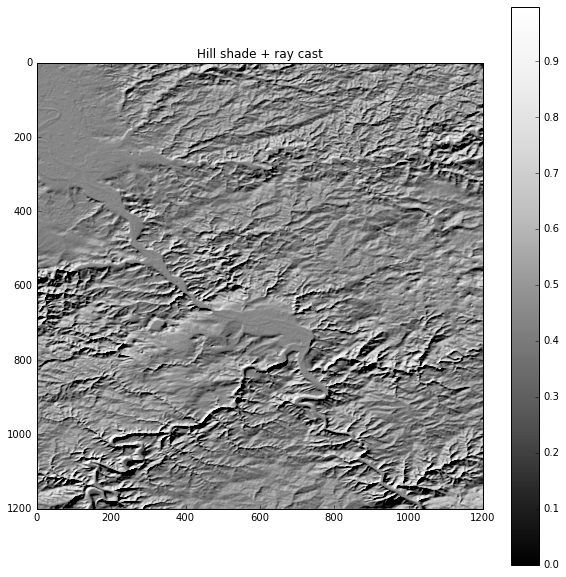

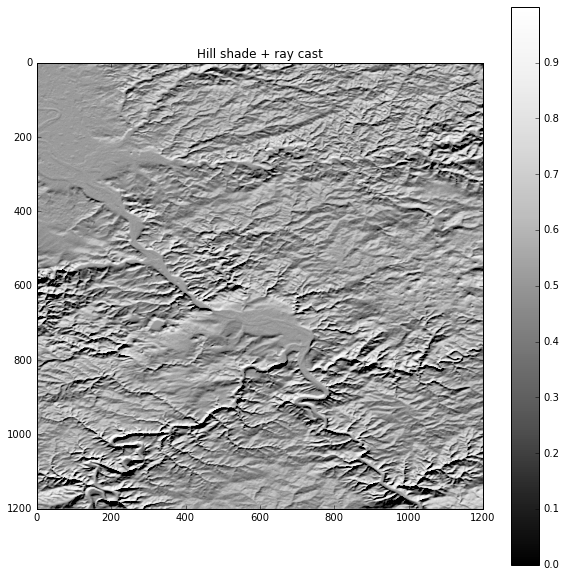

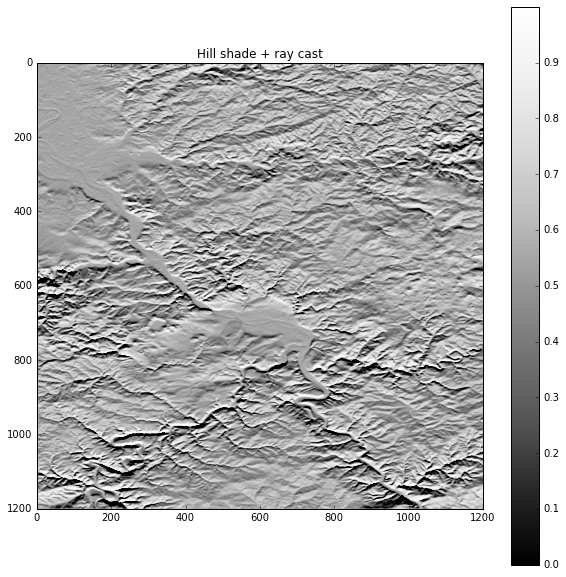

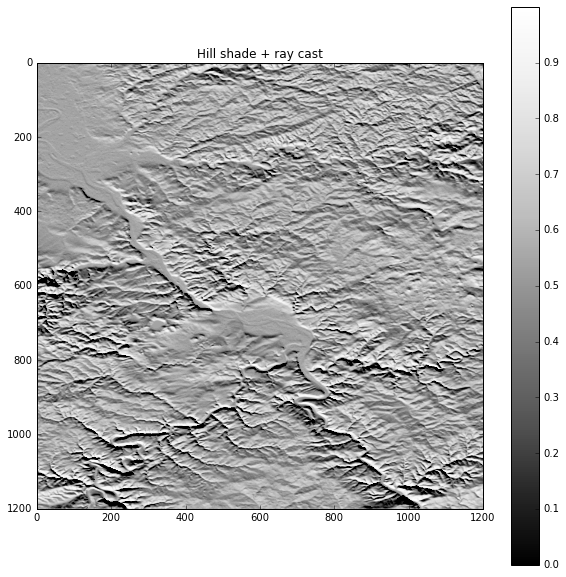

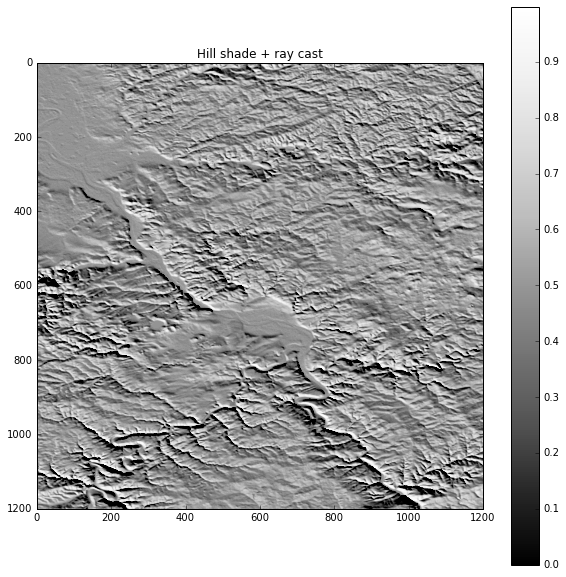

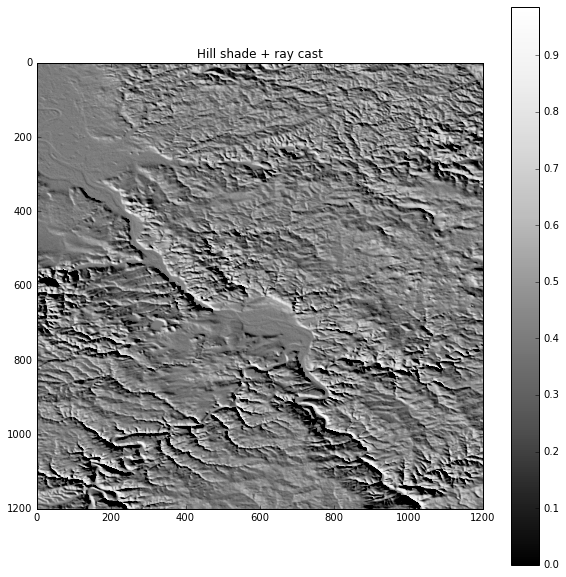

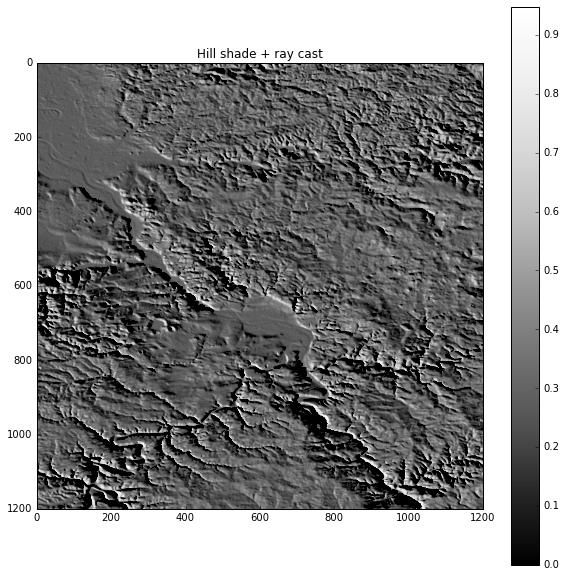

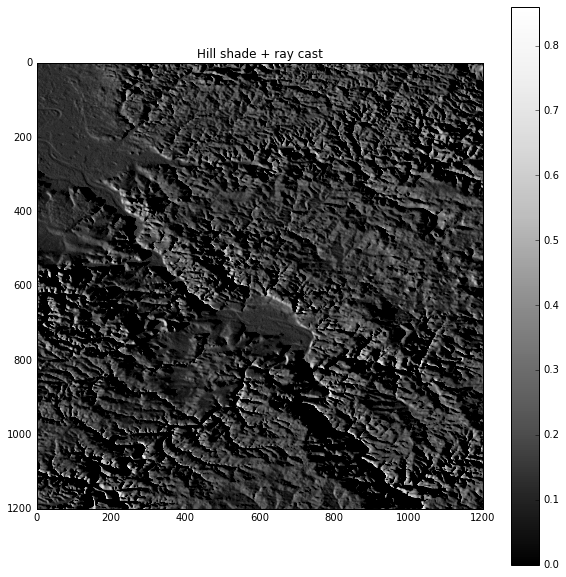

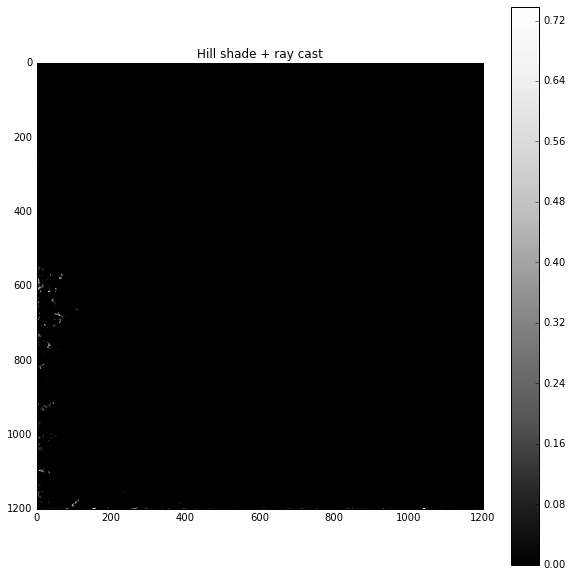

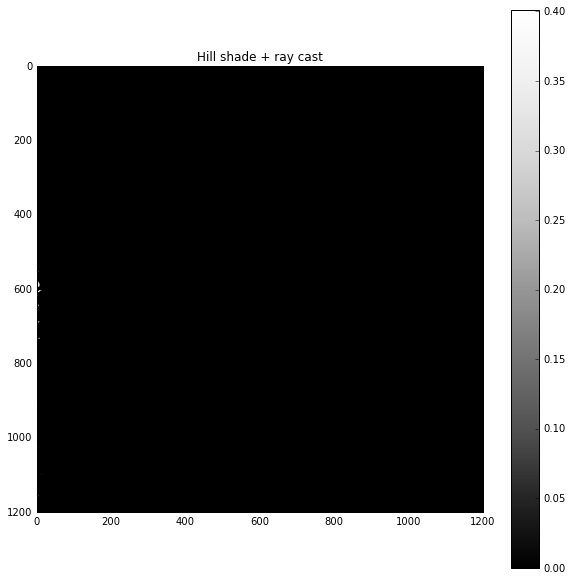

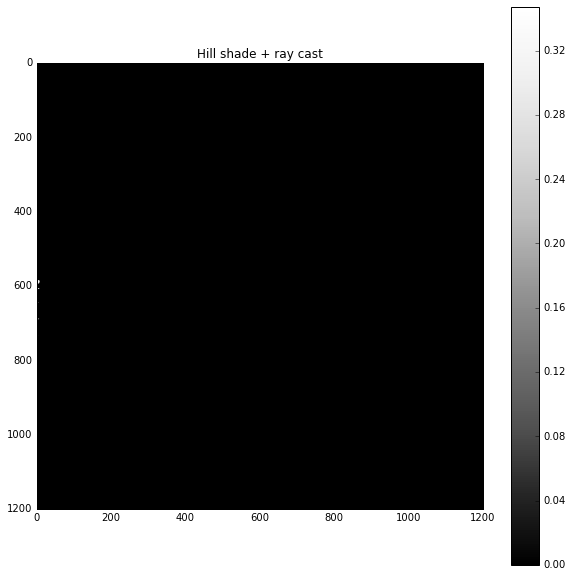

In [45]:
# N50E007
from datetime import datetime
import dem_methods

for hour in range(6, 23):
    print("Hour ", hour)
    time = datetime(2016, 10, 7, hour)
    sv = dem_methods.sun_vector(dem_methods.to_juliandate(time), 50.5, 7.5, 1)
    hsh = dem_methods.hill_shade(grad, sv)
#     plt.figure(figsize=(8,8))
#     plt.imshow(hsh, cmap='Greys_r')
#     plt.title("Hill shade")
#     plt.colorbar()
#     plt.show()

    rc = dem_methods.raycast(bl, sv, 30)
#     plt.figure(figsize=(10,10))
#     plt.imshow(rc, cmap='Greys_r')
#     plt.title("Ray casting")
#     plt.colorbar()
#     plt.show()

    plt.figure(figsize=(10, 10))
    plt.imshow(hsh * rc, cmap='Greys_r')
    plt.title("Hill shade + ray cast")
    plt.colorbar()
#     plt.show()
    plt.savefig('img/hour_{hour}.png'.format(hour=hour))

